# The ESDC data cube v2.0.0


## Usage



__Open a Cube (config: 8d, 0.25deg)__


In [3]:
import xarray as xr
ds = xr.open_zarr('/home/jovyan/work/datacube/ESDCv2.0.0/esdc-8d-0.25deg-1x720x1440-2.0.0.zarr/')
ds

<xarray.Dataset>
Dimensions:                            (bnds: 2, lat: 720, lon: 1440, time: 1702)
Coordinates:
  * lat                                (lat) float32 89.875 89.625 89.375 ...
    lat_bnds                           (lat, bnds) float32 dask.array<shape=(720, 2), chunksize=(720, 2)>
  * lon                                (lon) float32 -179.875 -179.625 ...
    lon_bnds                           (lon, bnds) float32 dask.array<shape=(1440, 2), chunksize=(1440, 2)>
  * time                               (time) datetime64[ns] 1980-01-05 ...
    time_bnds                          (time, bnds) datetime64[ns] dask.array<shape=(1702, 2), chunksize=(1702, 2)>
Dimensions without coordinates: bnds
Data variables:
    Rg                                 (time, lat, lon) float32 dask.array<shape=(1702, 720, 1440), chunksize=(1, 720, 1440)>
    aerosol_optical_thickness_1600     (time, lat, lon) float32 dask.array<shape=(1702, 720, 1440), chunksize=(1, 720, 1440)>
    aerosol_optical_thic

__Open a variable (e.g. par)__

In [4]:
ds.par

<xarray.DataArray 'par' (time: 1702, lat: 720, lon: 1440)>
dask.array<shape=(1702, 720, 1440), dtype=float32, chunksize=(1, 720, 1440)>
Coordinates:
  * lat      (lat) float32 89.875 89.625 89.375 89.125 88.875 88.625 88.375 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
  * time     (time) datetime64[ns] 1980-01-05 1980-01-13 1980-01-21 ...
Attributes:
    long_name:      Photosynthetically active radiation
    project_name:   BESS
    references:     Ryu, Y.*, Jiang, C., Kobayashi, H., & Detto, M. (2018). M...
    source_name:    surface_downwelling_photosynthetic_radiative_flux_in_air
    standard_name:  surface_downwelling_photosynthetic_radiative_flux_in_air
    units:          W m-2
    url:            http://environment.snu.ac.kr/bess_rad/

__Plot a time step__

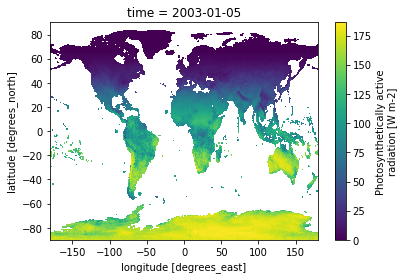

In [6]:
v = ds.par.sel(time='2003-01-05')
v.plot()

__Plot a regional subset__:

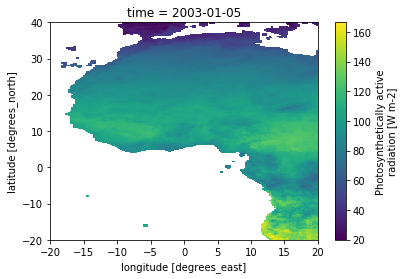

In [7]:
v = ds.par.loc[dict(lat=slice(40, -20), lon=slice(-20, 20), time='2003-01-05')]
v.plot()

__Plot a time step close to your choice__

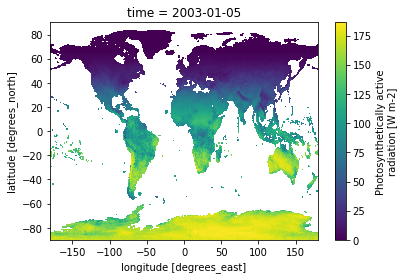

In [8]:
v = ds.par.sel(time='2003-01-08', method='nearest')
v.plot()

__Plot a time series for a particular location__

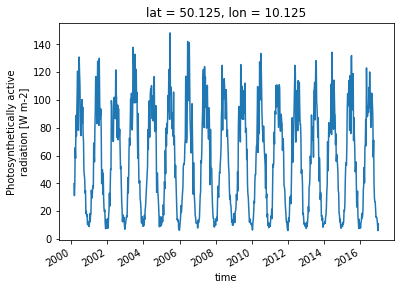

In [9]:
v = ds.par.sel(dict(lat=50, lon=10), method='nearest')
v.plot()